## Stroke Prediction

### <ins>1. Objective</ins>
#### Stroke is the 2nd leading cause of death globally, accounting for 11% of total deaths worldwide according to the World Health Organization (WHO).
#### The ability to predict the likehood of a patient to get stroke based on the various health and patient demographics, like gender, age, various diseases, and smoking status, may faciliate preventative medical interventions to save lives.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### <ins>2. Data</ins>
#### Data is from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

#### Data consists of
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
print(df.head())
df = df.set_index('id')

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [3]:
print('Number of patients: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of patients:  5110
Number of columns:  11


#### Cleaning data by removing duplicates.

In [4]:
print('Duplicated observation ', df[df.duplicated()])
df = df.drop_duplicates()
print('New number of patients: ', df.shape[0])

Duplicated observation  Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []
New number of patients:  5110


#### Information on data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [6]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Feature Engineering: Imputation
#### BMI is body mass index, weight/height^2, and is a typical indicator of obesity and general health. As such, BMI could contribute strongly to risk of stroke.
#### Explore to identify any trends in age and gender for those null BMI to aid in imputation.

<Figure size 640x480 with 0 Axes>

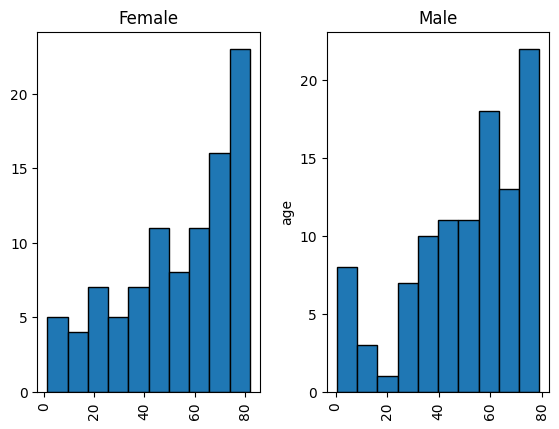

In [8]:
df_bmi_null = df[df['bmi'].isnull() == True]
plt.figure();
df_bmi_null.hist(by='gender', column=['age'], grid=False, edgecolor = "black");
plt.ylabel('age');

In [9]:
print('Statistics of null BMI by Female gender')
print(df_bmi_null[df_bmi_null['gender'] == 'Female']['age'].describe())

print('Statistics of null BMI by Male gender')
print(df_bmi_null[df_bmi_null['gender'] == 'Male']['age'].describe())

Statistics of null BMI by Female gender
count    97.000000
mean     53.302268
std      22.519195
min       1.320000
25%      38.000000
50%      60.000000
75%      73.000000
max      82.000000
Name: age, dtype: float64
Statistics of null BMI by Male gender
count    104.000000
mean      50.880385
std       22.091668
min        0.480000
25%       35.000000
50%       57.500000
75%       70.250000
max       79.000000
Name: age, dtype: float64


#### Wide range in age span for both genders with null BMI values.
#### [Given BMI varies substantially by age](https://www.cdc.gov/nccdphp/dnpa/growthcharts/training/modules/module1/text/module1print.pdf), need to calculate the median BMI for each age group for imputation of BMI. Add new column to classify each patient by their age group and impute the null BMI with their respective medians.
#### [Age groups](https://www.statcan.gc.ca/en/concepts/definitions/age2):
* less than 14 years, children
* 15 to 24, youth
* 25 to 64, adults
* greater than 65, seniors


In [10]:
# Function to define age group based on age, returns age group name
def define_age_group(age):
    if age <= 14:
        return 'child'
    elif age > 14 and age <=24:
        return 'youth'
    elif age > 24 and age <=64:
        return 'adult'
    elif age > 64:
        return 'senior'

In [11]:
# apply function to add age_group definition
df['age_group'] = df.apply(lambda x: define_age_group(x['age']), axis=1)

In [12]:
# calculate median bmi based on age group
median_bmi_age_group = df[['bmi', 'gender', 'age_group']].groupby(['age_group', 'gender'])['bmi'].median().reset_index()  # median() ignores NaN by default.

In [13]:
# Function to impute median based on age group for null bmi
def impute_bmi(age_group_x, gender_x, bmi_x):
    if pd.isnull(bmi_x):
        return median_bmi_age_group.query('age_group == @age_group_x & gender == @gender_x')['bmi'].values[0]
    else:
        return bmi_x

In [14]:
# apply function to add age_group definition
df['bmi'] = df.apply(lambda x: impute_bmi(x['age_group'], x['gender'], x['bmi']), axis=1)

# confirm no nulls in bmi
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_group            0
dtype: int64

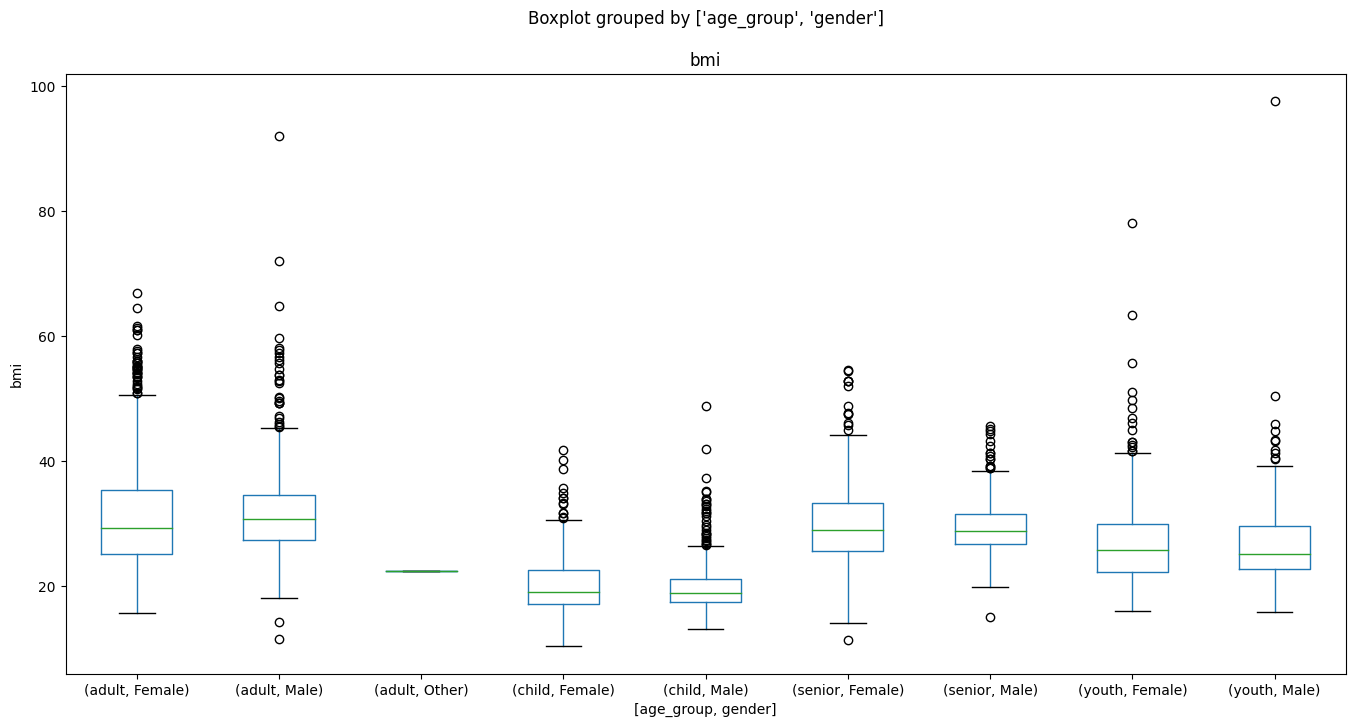

In [15]:
# distribution of bmi by age group and gender
df.boxplot(by=['age_group', 'gender'], column=['bmi'], grid=False, figsize=(16,8));
plt.ylabel('bmi');

#### Drop 'Other' gender as only 1 data point

In [16]:
print(df['gender'].value_counts())
df = df[df['gender'] != 'Other']
print(df['gender'].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Female    2994
Male      2115
Name: gender, dtype: int64


#### Summary statistics of data.

In [17]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.877471,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.723424,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.300000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### Distribution of data.
Imbalanced target classes, more non-stroke than stroke.

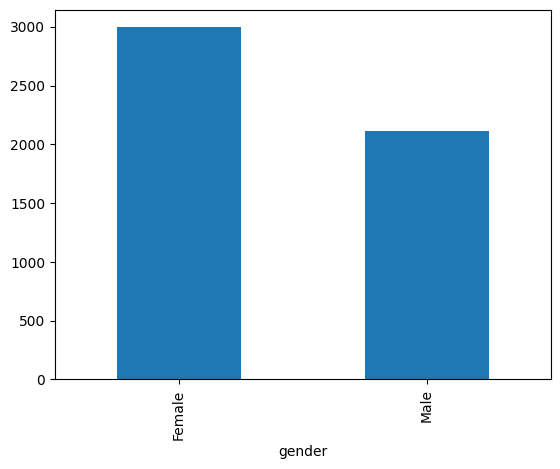

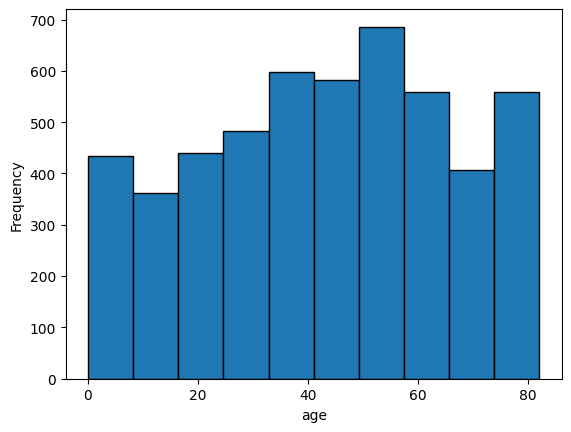

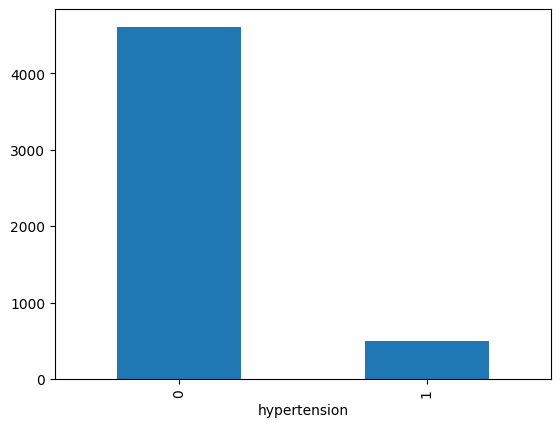

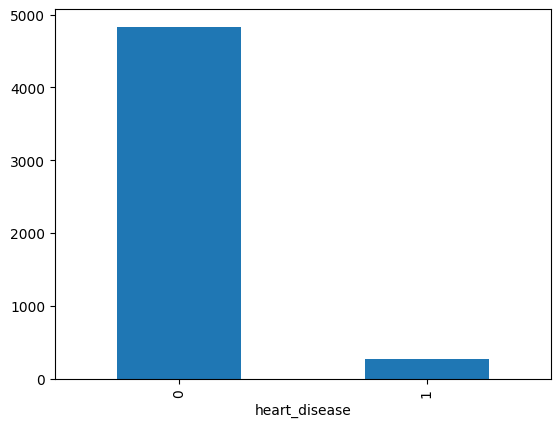

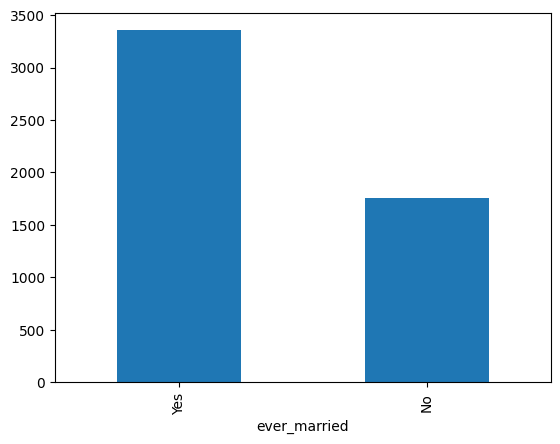

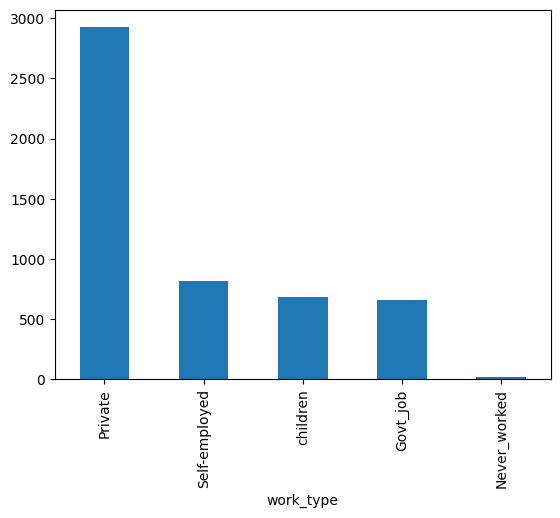

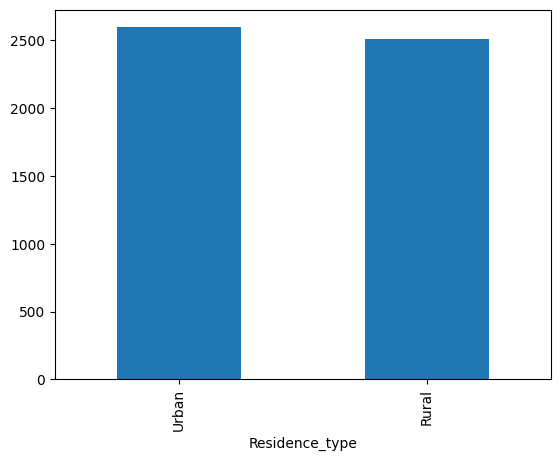

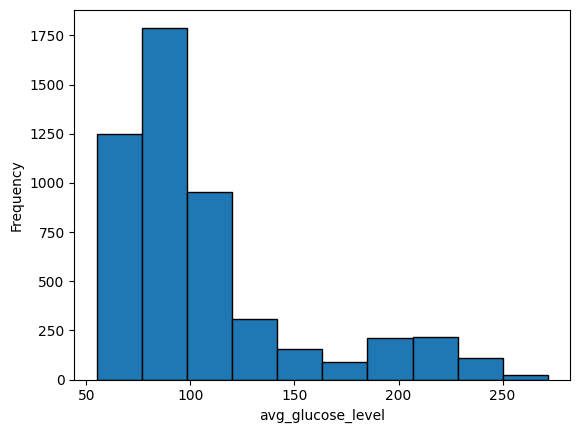

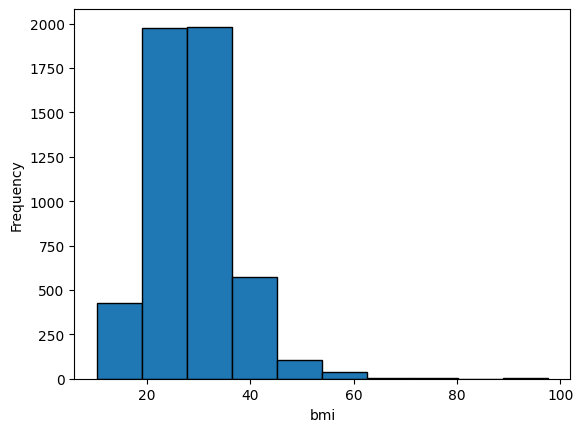

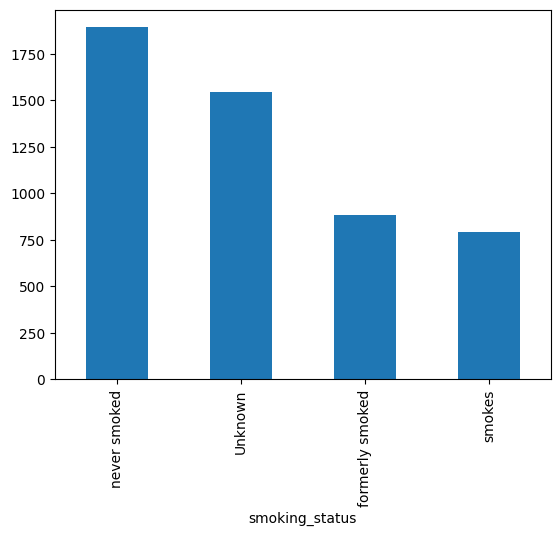

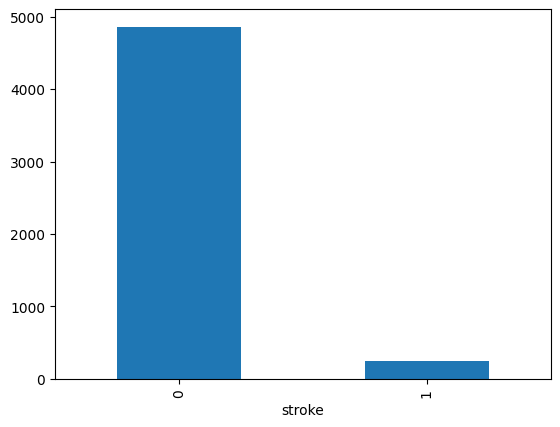

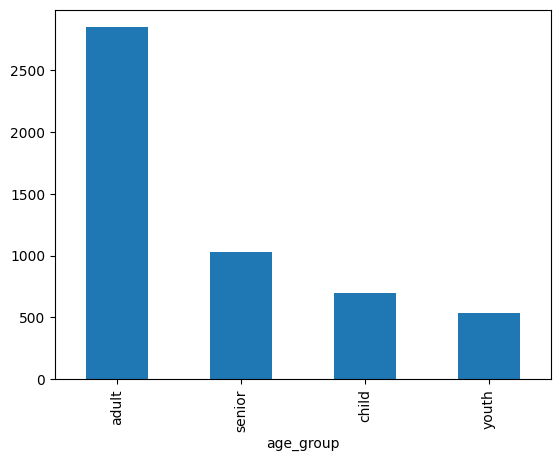

In [18]:
continuous_features = ['age', 'avg_glucose_level', 'bmi']
for column in df.columns:
    if column in continuous_features:
        plt.figure()
        df[column].plot.hist(edgecolor = "black");
        plt.xlabel(column)
    else:
        plt.figure()
        df[column].value_counts().plot(kind='bar')
        plt.xlabel(column)

Number of non-stroke vs stroke
Ratio of classes:  0.05123456790123457


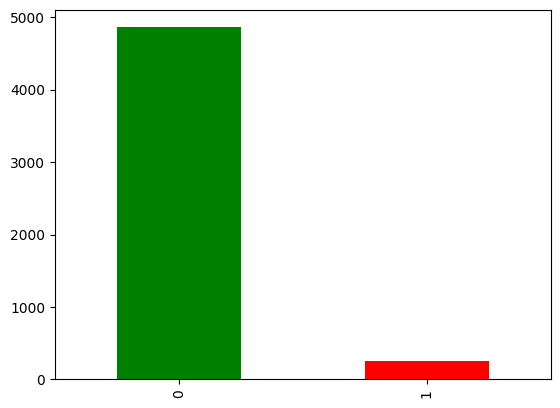

In [19]:
print('Number of non-stroke vs stroke')
df['stroke'].value_counts().plot.bar(color=['green', 'red'])
print('Ratio of classes: ', df['stroke'].value_counts().iloc[1]/df['stroke'].value_counts().iloc[0])

#### Visualize correlations between numerical data.

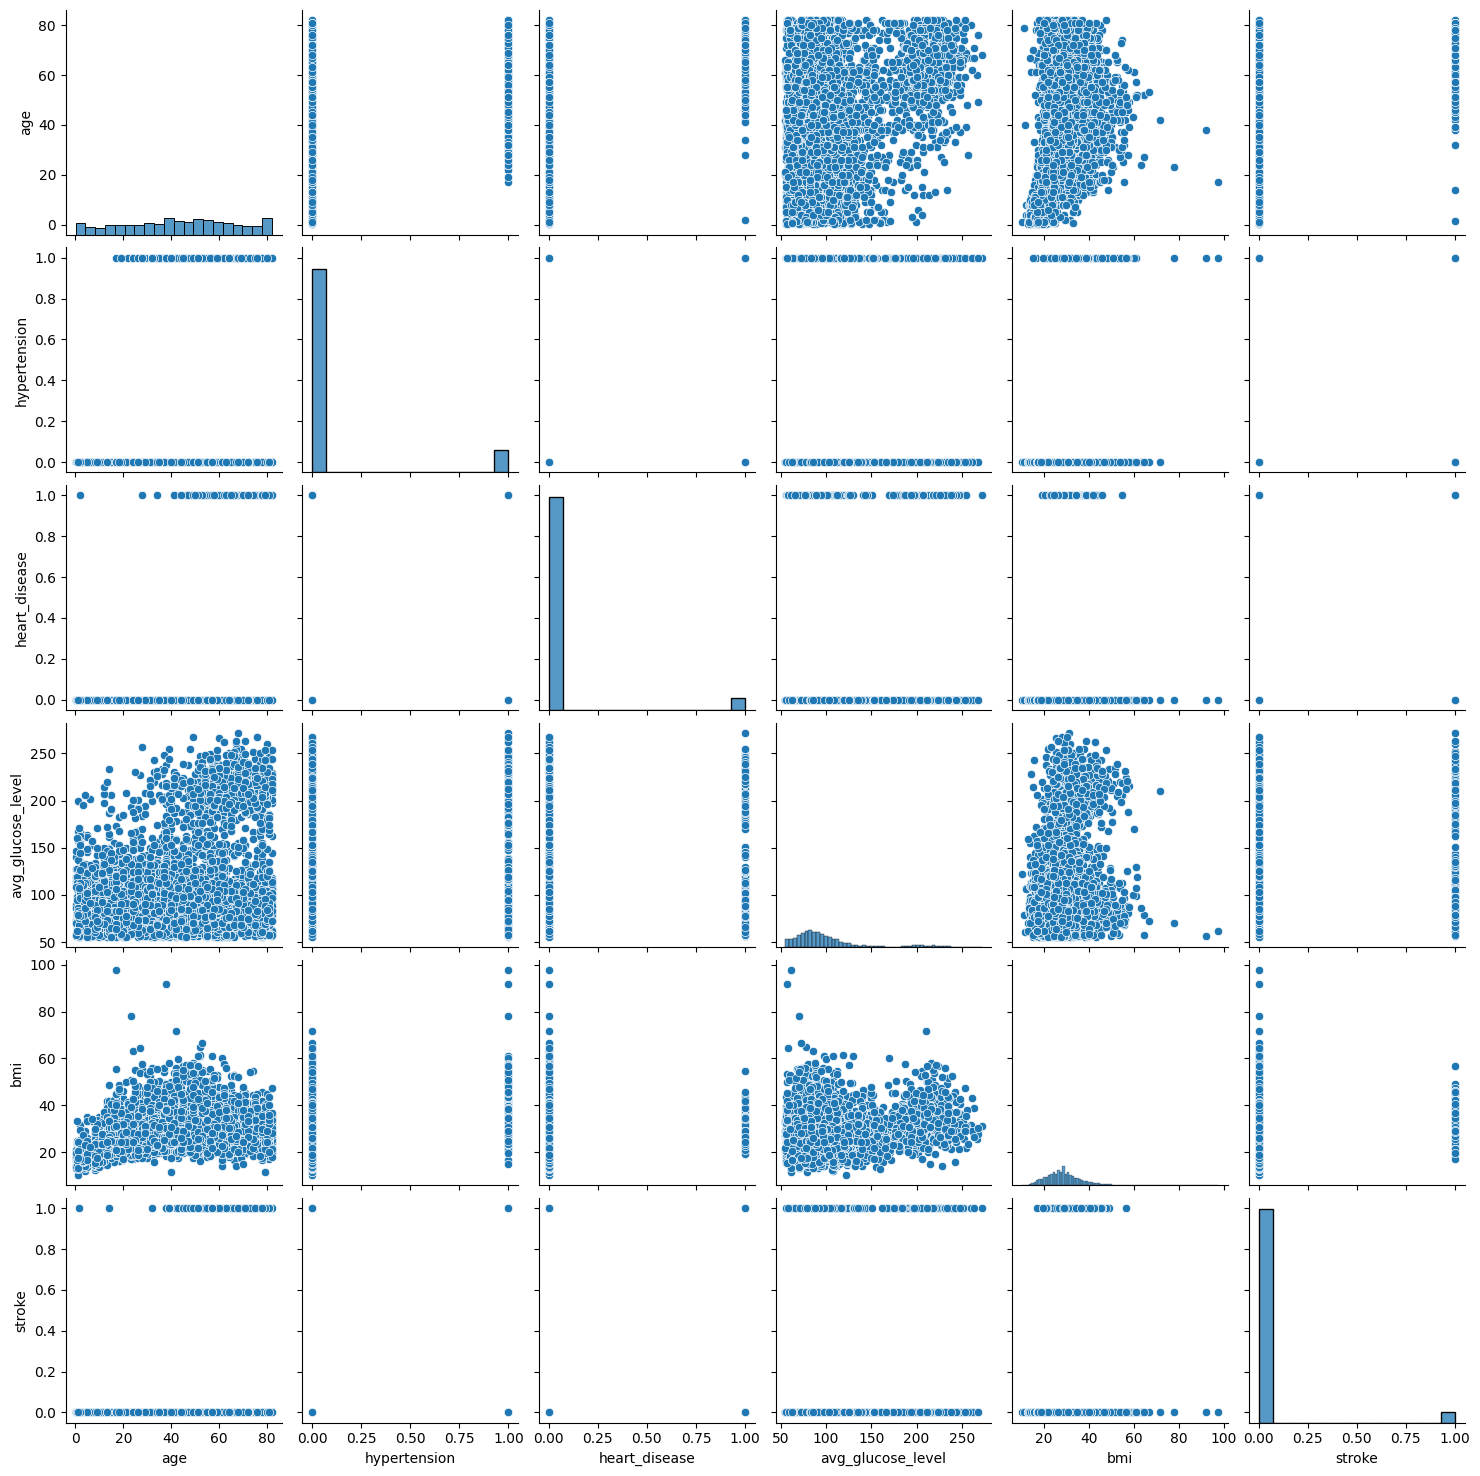

In [20]:
sns.pairplot(df);

C:\Users\kay\AppData\Local\Temp\ipykernel_12948\3888966817.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

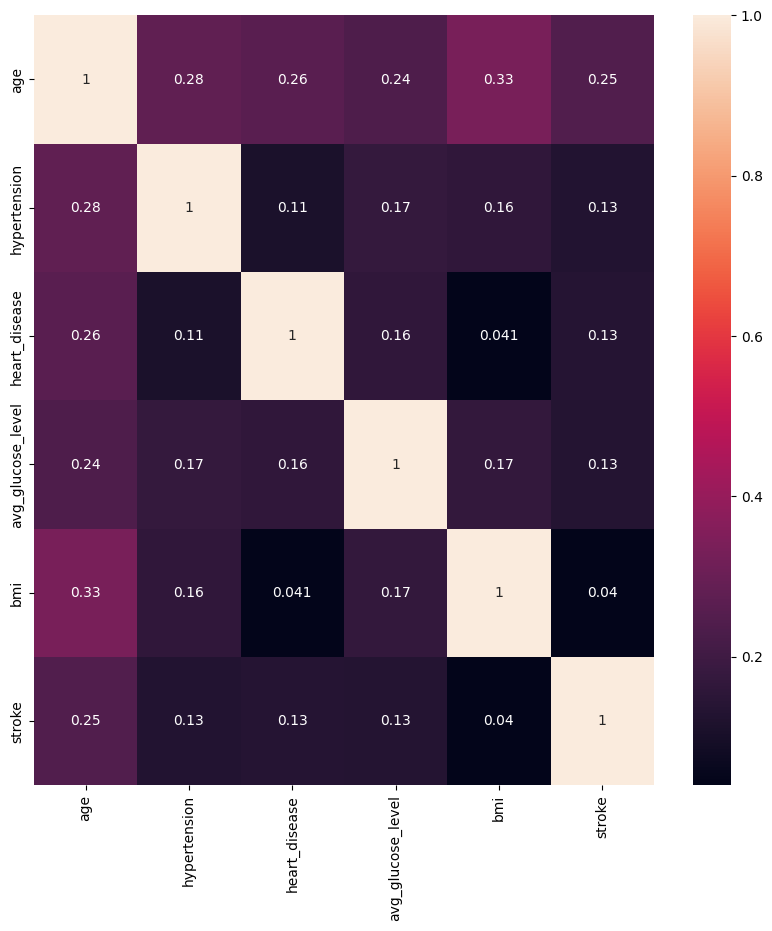

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

#### Rank strength of correlations
Highest correlation is only 0.33 between non-identical features, indicating not strong correlations between independent features individually.

In [22]:
df.corr().unstack().sort_values(ascending=False)

C:\Users\kay\AppData\Local\Temp\ipykernel_12948\3896394859.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().unstack().sort_values(ascending=False)


age                age                  1.000000
hypertension       hypertension         1.000000
bmi                bmi                  1.000000
avg_glucose_level  avg_glucose_level    1.000000
heart_disease      heart_disease        1.000000
stroke             stroke               1.000000
age                bmi                  0.333143
bmi                age                  0.333143
hypertension       age                  0.276367
age                hypertension         0.276367
                   heart_disease        0.263777
heart_disease      age                  0.263777
stroke             age                  0.245239
age                stroke               0.245239
                   avg_glucose_level    0.238323
avg_glucose_level  age                  0.238323
hypertension       avg_glucose_level    0.174540
avg_glucose_level  hypertension         0.174540
                   bmi                  0.169657
bmi                avg_glucose_level    0.169657
hypertension       b

#### Feature engineering: categorical features
Convert categorical features (gender, ever_married, smoking_status, age_group, work_type, residence_type) to nominal.


In [23]:
# collect list of categorical features
categorical_features = list()
for column in df.columns:
    if df[column].dtypes == 'object':
        categorical_features.append(column)

# remove age_group created
categorical_features.remove('age_group')

# convert categorical features to nomial
df_feat_eng = pd.get_dummies(df[categorical_features], drop_first=True)

# concat to existing numerical features
df_featured = pd.concat([df, df_feat_eng], axis=1)

# drop duplicate features
df_featured = df_featured.drop(['age_group', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis=1, errors='ignore')

#### Scale feature values by min and max, similar to nominal features, so ranges are normalized to from 0 to 1.

In [24]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
for column in df_featured.columns:
    df_featured[column] = mm.fit_transform(df_featured[[column]])

round(df_featured.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
age,5109.0,0.527,0.276,0.0,0.304,0.548,0.744,1.0
hypertension,5109.0,0.097,0.297,0.0,0.000,0.000,0.000,1.0
heart_disease,5109.0,0.054,0.226,0.0,0.000,0.000,0.000,1.0
avg_glucose_level,5109.0,0.236,0.209,0.0,0.102,0.170,0.272,1.0
bmi,5109.0,0.213,0.088,0.0,0.153,0.206,0.258,1.0
stroke,5109.0,0.049,0.215,0.0,0.000,0.000,0.000,1.0
gender_Male,5109.0,0.414,0.493,0.0,0.000,0.000,1.000,1.0
ever_married_Yes,5109.0,0.656,0.475,0.0,0.000,1.000,1.000,1.0
work_type_Never_worked,5109.0,0.004,0.065,0.0,0.000,0.000,0.000,1.0
work_type_Private,5109.0,0.572,0.495,0.0,0.000,1.000,1.000,1.0


In [25]:
df_featured.to_csv('./healthcare-dataset-stroke-data-cleaned.csv')

#### Split first into training and testing datasets
confirm class ratios for y_train and y_test with whole dataset.

y_train
Number of non-stroke vs stroke
Ratio of classes:  0.051183127572016464


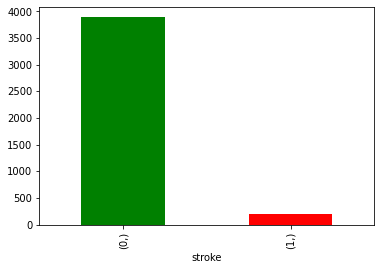

In [25]:
from sklearn.model_selection import train_test_split

X = df_featured.loc[ : , df_featured.columns != 'stroke']
y = df_featured['stroke'].astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 12345)

print('y_train')
print('Number of non-stroke vs stroke')
y_train.to_frame().value_counts().plot.bar(color=['green', 'red'])
print('Ratio of classes: ', y_train.to_frame().value_counts().iloc[1]/y_train.to_frame().value_counts().iloc[0])

y_test
Number of non-stroke vs stroke
Ratio of classes:  0.051440329218107


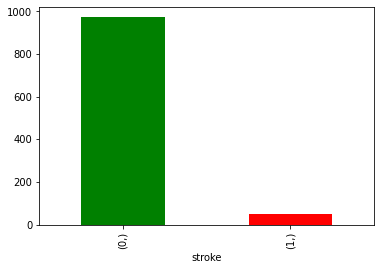

In [26]:
print('y_test')
print('Number of non-stroke vs stroke')
y_test.to_frame().value_counts().plot.bar(color=['green', 'red'])
print('Ratio of classes: ', y_test.to_frame().value_counts().iloc[1]/y_test.to_frame().value_counts().iloc[0])

#### Synthetic Minority Oversampling Technique (SMOTE)
SMOTE first creates many pairs or small clusters with two or more similar instances, the measure by instance distance such as Euclidean distance.
Then, within the boundary of each pair or cluster, SMOTE uniformly permutes features value, one feature at a time, to populate a collection of similar synthesized instances within each pair or cluster.
As a result, SMOTE creates a class-balanced synthetic dataset without adding duplicated instances with minority labels.

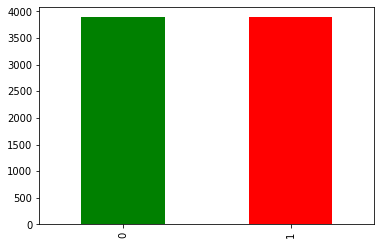

In [27]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote_sampler = SMOTE(random_state = 12345)
X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)
y_smo.value_counts().plot.bar(color=['green', 'red']);

#### Oversampling of the minority class to build up to the class size similar to that of majority

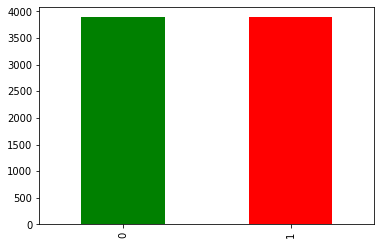

In [28]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train, y_train)
y_over.value_counts().plot.bar(color=['green', 'red']);

#### Undersampling of majority class to reduce class size to similar to that of minority

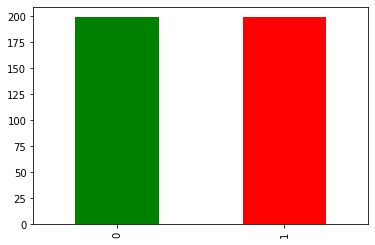

In [29]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X_train, y_train)
y_under.value_counts().plot.bar(color=['green', 'red']);

### <ins>3. Classifier models used to predict stroke</ins>,
1. Logistic Regression
2. SVC
3. Random Forest

* GridSearchCV is used for hyperparameter tunning of each of the 3 models.
* cross-validation of 5 folds to avoid overfitting.
* confusion matrix to visualize prediction/truth grid.

In [30]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, plot_confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score

#### Logistic Regression

confusion matrix and classification report to visualize and tabulation model performance.

{'C': 1, 'max_iter': 100}


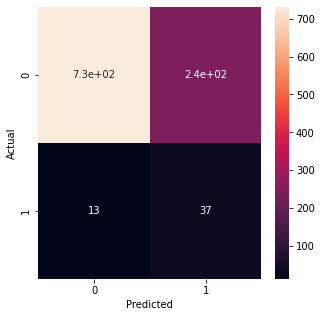

In [31]:
# fit to logistic regression model
param_grid = {'C':[0.001,0.1, 1,10, 100], 
            'max_iter':[100, 500,1000]}

log = GridSearchCV(LogisticRegression(solver='lbfgs'),
                         param_grid,
                         cv=5)
log.fit(X_under,y_under)
print(log.best_params_)

# predict from X_test (which is imbalanced)
y_pred_log = log.predict(X_test)
confusion_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(5, 5));
sns.heatmap(confusion_log, annot=True);
plt.xlabel("Predicted");
plt.ylabel("Actual");

In [32]:
scores = list()

accuracy = accuracy_score(y_test, y_pred_log)
precision, recall, fbeta, support = precision_recall_fscore_support(y_test, y_pred_log, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(y_test, y_pred_log)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {fbeta:.2f}")
print(f"AUC is: {auc:.2f}")

scores.append(('Logistic Regression', accuracy, precision, recall, fbeta, auc))

Accuracy is: 0.75
Precision is: 0.13
Recall is: 0.74
Fscore is: 0.63
AUC is: 0.75


#### Support Vector Machine Classifier

confusion matrix and classification report to visualize and tabulation model performance.

{'C': 10, 'gamma': 1e-05, 'kernel': 'linear'}


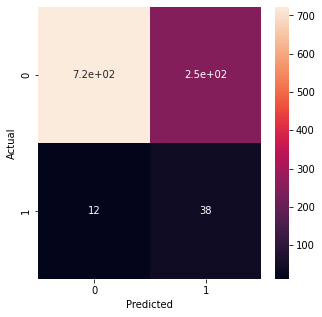

In [33]:
# fit to logistic regression model
param_grid={'kernel':('linear', 'rbf'),
            'C':[0.01, 0.1, 1, 10, 100], 
            'gamma':[0.00001, 0.0001, 0.01, 1]}
svc = GridSearchCV(SVC(probability= True),
                               param_grid,
                               cv=5)
svc.fit(X_under, y_under)
print(svc.best_params_)

# predict from X_test (which is imbalanced)
y_pred_svc = svc.predict(X_test)

confusion = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(5, 5));
sns.heatmap(confusion, annot=True);
plt.xlabel("Predicted");
plt.ylabel("Actual");

In [34]:
accuracy = accuracy_score(y_test, y_pred_svc)
precision, recall, fbeta, support = precision_recall_fscore_support(y_test, y_pred_svc, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(y_test, y_pred_svc)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {fbeta:.2f}")
print(f"AUC is: {auc:.2f}")

scores.append(('SVC', accuracy, precision, recall, fbeta, auc))

Accuracy is: 0.74
Precision is: 0.13
Recall is: 0.76
Fscore is: 0.64
AUC is: 0.75


#### Random Forest Classifier

confusion matrix and classification report to visualize and tabulation model performance.

{'C': 10, 'gamma': 1e-05, 'kernel': 'linear'}


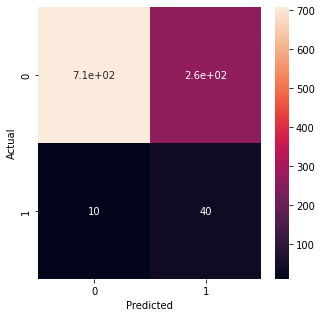

In [35]:
# fit to Random Forest model
param_grid = {'n_estimators': [50, 75,100, 150, 200,300]}
rf = GridSearchCV(RandomForestClassifier(random_state=12345),
                 param_grid,
                 cv=5)
rf.fit(X_under, y_under)
print(svc.best_params_)

# predict from X_test (which is imbalanced)
y_pred_rf = rf.predict(X_test)
confusion_rf = confusion_matrix(y_test, rf.predict(X_test))
plt.figure(figsize=(5, 5));
sns.heatmap(confusion_rf, annot=True);
plt.xlabel("Predicted");
plt.ylabel("Actual");

In [36]:
accuracy = accuracy_score(y_test, y_pred_rf)
precision, recall, fbeta, support = precision_recall_fscore_support(y_test, y_pred_rf, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(y_test, y_pred_rf)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {fbeta:.2f}")
print(f"AUC is: {auc:.2f}")

scores.append(('Random Forest', accuracy, precision, recall, fbeta, auc))

Accuracy is: 0.73
Precision is: 0.13
Recall is: 0.80
Fscore is: 0.67
AUC is: 0.76


### <ins>Best model selection</ins>

All 3 models perform similarly with respective to accuracy, precision, recall, f-score and AUC for the test dataset. Since the test dataset is as imbalanced as the training dataset, the precision is quite low, which lowered the fscore. But the Random Forest model has slightly higher AUC and F-score, both of which are somewhat less sensitive to imbalanced dataset than precision and recall.

In [37]:
df_scores = pd.DataFrame(scores, columns=['model', 'accuracy', 'precision', 'recall', 'fscore', 'AUC'])
df_scores = df_scores.set_index('model')
df_scores

,accuracy,precision,recall,fscore,AUC
model,,,,,
Logistic Regression,0.751468,0.133094,0.74,0.629581,0.746029
SVC,0.743640,0.131944,0.76,0.642393,0.751399
Random Forest,0.732877,0.132013,0.80,0.669672,0.764712


### <ins>4. Key Findings</ins>

From the ranking of the feature importances of the Random Forest model below, the top 3 important features are age, avg_glucose_level and bmi. The rest of the features are much lower in terms of their importance.

This ranking is similar but not identical to the ranking for the linear correlations to stroke explored in the EDA above. For that list (see below), age, heart_disease and avg_glucose_level are the top 3 correlations, although they are low, at less than 0.25. BMI is the lowest at 0.0397.

The 2 evaluations indicate age, avg_glucose_level and bmi are significant features but they are not linearly correlated to stroke and a more complex relationship exists between these features and stroke prediction.

|                   | correlation with stroke   |
|-------------------|----------|
| age               | 0.245239 |
| heart_disease     | 0.134905 |
| avg_glucose_level | 0.131991 |
| hypertension      | 0.127891 |
| bmi               | 0.039705 |

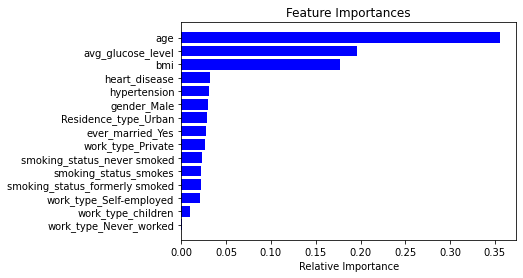

In [38]:
# collect feature names
features = df_featured.columns.tolist()
features.remove('stroke')

# collect importances
importances = rf.best_estimator_.feature_importances_

# sort importances
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### <ins>5. Flaws and improvements</ins>
Stroke is a complex medical condition with a lot of other factors that may account for it beyond the ones explored in this dataset, namely age, gender, bmi, hypertension, smoking, etc.

From the exploratory analyses, age, bmi, hypertension and heart_disease have a slight correlation with stroke, but these are similar factors and appears to be co-related to themselves.
But there are also other more apparent factors like occupation, pre-existing conditions, genetic predispositions, etc., which should be included to improve the prediction accuracies.

Further improvements can be with the use other classification models that uses boosting such as Gradient Boosted Classifier and AdaBoost.